In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from statistics import mode
import random
import os
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree #Plot tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.utils import shuffle
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import decomposition

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [6]:
# Read the CSV file 
df = pd.read_csv('winequality-red.csv', sep=';', encoding='utf-8')
# Check the DataFrame

# # Select all columns except the last one as features (X)
X = df.iloc[:, :-1]

# # Select the last column as the target variable (y)
y = df.iloc[:, -1]

# print(X)
# print(y)
X.shape

(1599, 11)

In [7]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# PCA Visualization

In [151]:
# Perform the decomposiion
pca = decomposition.PCA(n_components=6)# rank = 6
pca.fit(X)
X_reduced = pca.transform(X)
print("The shape of the reduced feature sets is: ")
X_reduced.shape

The shape of the reduced feature sets is: 


(1599, 6)

In [9]:
X_reduced[0]

array([-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
        -1.08538902,  -0.19801755])

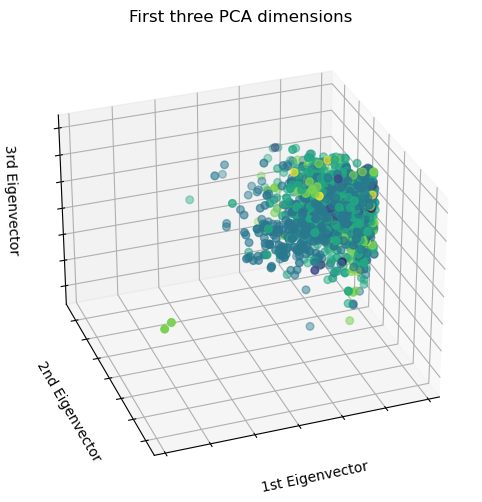

In [10]:
# Plot

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y, #color based on y
    s=30,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

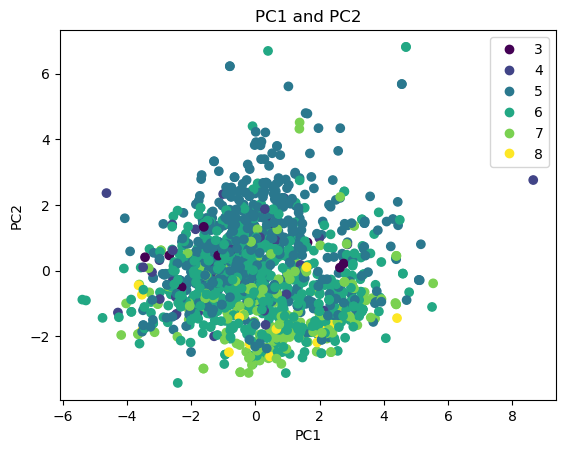

In [11]:
# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(["3", "4", "5", "6", "7", "8"]))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 and PC2")

# figure, axis = plt.subplots(2, 2) 
# axis[0, 0].scatter(Xt[:,0], Xt[:,1], c=y)
# axis[0, 0].legend(handles=plot.legend_elements()[0], labels=list(["3", "4", "5", "6", "7", "8"]))
# axis[0, 0].set_xlabel("PC1")
# axis[0, 0].set_ylabel("PC2")
# axis[0, 0].set_title("PC1 and PC2")
plt.show()

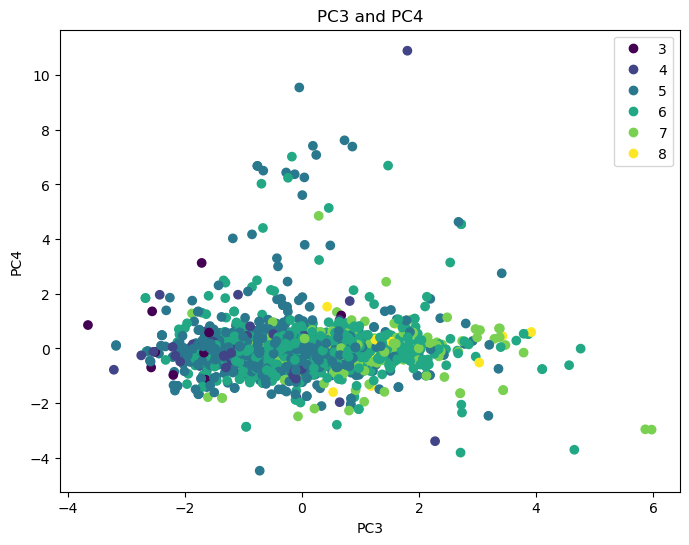

In [225]:
# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,2], Xt[:,3], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(["3", "4", "5", "6", "7", "8"]))
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.title("PC3 and PC4")
plt.show()

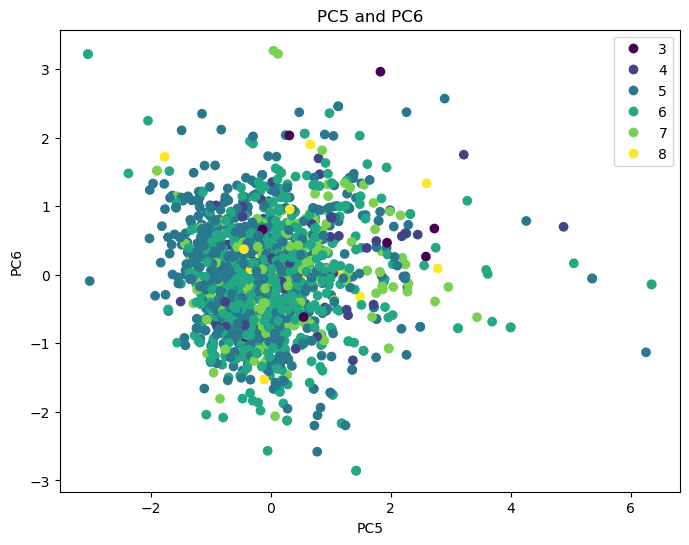

In [226]:
# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,4], Xt[:,5], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(["3", "4", "5", "6", "7", "8"]))
plt.xlabel("PC5")
plt.ylabel("PC6")
plt.title("PC5 and PC6")
plt.show()

## Conclusion: From PCA plots, we can tell that the classes are not easily to be separated. We thus need to apply more powerful and complex models. 

# Error analysis function
## wrong_prediction_analysis(labels, predictions) function takes the labels and predictions in array form and print out the analysis. For example, the percentage of each label being misclassified. Also, the likelihood of a quality being misclassfied. 
## This can be used for plot confusion matrix

In [119]:
# A helper function
def misclassified_to(quality, labels, predictions):
    
    wrong_indices = np.where(predictions != labels)[0]
    misclassified = {
        3: 0,
        4: 0,
        5: 0,
        6: 0,
        7: 0,
        8: 0
    }
    
    for i in range(len(wrong_indices)):
        current_index = wrong_indices[i]
        current_label = labels[current_index]
        if(current_label == quality):
            current_prediction = predictions[current_index]
            misclassified[current_prediction] += 1
    
    # Calculate percentage
    misclassified_percent = {
        3: misclassified[3]/np.count_nonzero(labels == quality),
        4: misclassified[4]/np.count_nonzero(labels == quality),
        5: misclassified[5]/np.count_nonzero(labels == quality),
        6: misclassified[6]/np.count_nonzero(labels == quality),
        7: misclassified[7]/np.count_nonzero(labels == quality),
        8: misclassified[8]/np.count_nonzero(labels == quality)
    }
    misclassified_percent.pop(quality)   
    
    return misclassified_percent


# A function takes labels and predictions and print out the error analysis
def wrong_prediction_analysis(labels, predictions): 
    wrong_indices = np.where(predictions != labels)[0]

    print(f"Number of predictions: {len(labels)}")
    print(f"Number of wrong predictions: {len(wrong_indices)}")

    # Check which quality is easily be classified as wrong
    quality_wrong_counts = {
        3: 0,
        4: 0,
        5: 0,
        6: 0,
        7: 0,
        8: 0
    }
    for i in range(len(wrong_indices)): 
        current_index = wrong_indices[i]
        current_label = labels[current_index]
        quality_wrong_counts[current_label] += 1
    
    quality_counts = {
        3: np.count_nonzero(labels == 3),
        4: np.count_nonzero(labels == 4),
        5: np.count_nonzero(labels == 5),
        6: np.count_nonzero(labels == 6),
        7: np.count_nonzero(labels == 7),
        8: np.count_nonzero(labels == 8)
    }
    print("Wrong predictions count for each quality: ")        
    print(quality_wrong_counts)
    print("Total number for each quality")
    print(quality_counts)

    # Percentage of wrong classification
    quality_wrong_counts_percentage = {
        3: quality_wrong_counts[3]/np.count_nonzero(labels == 3),
        4: quality_wrong_counts[4]/np.count_nonzero(labels == 4),
        5: quality_wrong_counts[5]/np.count_nonzero(labels == 5),
        6: quality_wrong_counts[6]/np.count_nonzero(labels == 6),
        7: quality_wrong_counts[7]/np.count_nonzero(labels == 7),
        8: quality_wrong_counts[8]/np.count_nonzero(labels == 8)
    }
    print('\n')
    print("Misclassified Quality/Total Quality: ")
    print(quality_wrong_counts_percentage) 
    
    # For each quality, which quality are they misclassified
    print('\n')
    print("Quality 3 is likely to be misclassified as: ")
    print(misclassified_to(3, labels, predictions))
    print("Quality 4 is likely to be misclassified as: ")
    print(misclassified_to(4, labels, predictions))
    print("Quality 5 is likely to be misclassified as: ")
    print(misclassified_to(5, labels, predictions))
    print("Quality 6 is likely to be misclassified as: ")
    print(misclassified_to(6, labels, predictions))
    print("Quality 7 is likely to be misclassified as: ")
    print(misclassified_to(7, labels, predictions))
    print("Quality 8 is likely to be misclassified as: ")
    print(misclassified_to(8, labels, predictions))
    
    # Print confusion matrix
    cm = confusion_matrix(labels, predictions, labels=[3, 4, 5, 6, 7, 8])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=[3, 4, 5, 6, 7, 8], yticklabels=[3, 4, 5, 6, 7, 8])
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.title('Confusion Matrix')
    plt.show()

# Training

In [104]:
# split the data for training and testing  20% for testing and 80% for training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Perceptron and ANN

In [96]:
def train_perceptron_model(X_train, y_train, X_test, y_test):
   
    perceptron = Perceptron()

    # Train the model sequentially
    perceptron.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = perceptron.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

In [132]:
#ANN 
# Initialize the MLP classifier with custom activation function for hidden layers
# batch_size ='auto' 就是 sequential training 

def train_ann_model(X_train, y_train, X_test, y_test, num_neurons, plot=False, ):

    # Initialize the MLP classifier with specified hyperparameters
    mlp = MLPClassifier(
        hidden_layer_sizes=(num_neurons,),  # Number of neurons in the hidden layer
        activation='logistic',  # Activation function for the hidden layer
        max_iter=200,  # Maximum number of iterations (epochs)
        batch_size='auto',  # Batch size for training
        random_state=42  # Random state for reproducibility
    )

    # Train the model
    mlp.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred_mlp = mlp.predict(X_test)

    # Calculate the accuracy of the model
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
    
    # New: Plot the loss curve
    if (plot):
        plt.plot(mlp.loss_curve_)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss Curve with ' + str(num_neurons) + " neurons")
        plt.show()
    
    # Print error analysis
    wrong_prediction_analysis(y_test.values, y_pred_mlp)
    
    return accuracy_mlp # y_test.values turn panda series to an array

F:\anaconda2024\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


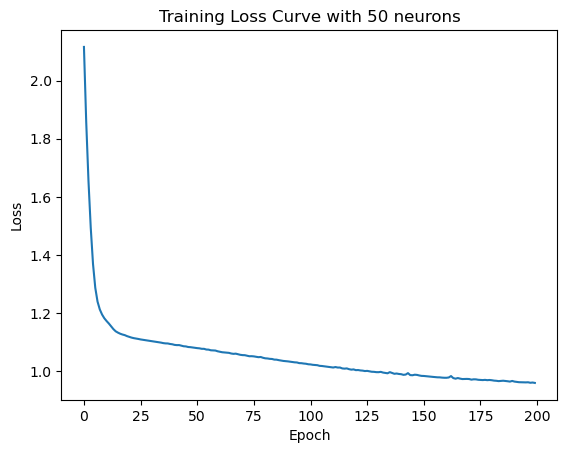

Number of predictions: 320
Number of wrong predictions: 142
Wrong predictions count for each quality: 
{3: 1, 4: 10, 5: 35, 6: 53, 7: 38, 8: 5}
Total number for each quality
{3: 1, 4: 10, 5: 130, 6: 132, 7: 42, 8: 5}


Misclassified Quality/Total Quality: 
{3: 1.0, 4: 1.0, 5: 0.2692307692307692, 6: 0.4015151515151515, 7: 0.9047619047619048, 8: 1.0}


Quality 3 is likely to be misclassified as: 
{4: 0.0, 5: 1.0, 6: 0.0, 7: 0.0, 8: 0.0}
Quality 4 is likely to be misclassified as: 
{3: 0.0, 5: 1.0, 6: 0.0, 7: 0.0, 8: 0.0}
Quality 5 is likely to be misclassified as: 
{3: 0.0, 4: 0.0, 6: 0.2692307692307692, 7: 0.0, 8: 0.0}
Quality 6 is likely to be misclassified as: 
{3: 0.0, 4: 0.0, 5: 0.3712121212121212, 7: 0.030303030303030304, 8: 0.0}
Quality 7 is likely to be misclassified as: 
{3: 0.0, 4: 0.0, 5: 0.09523809523809523, 6: 0.8095238095238095, 8: 0.0}
Quality 8 is likely to be misclassified as: 
{3: 0.0, 4: 0.0, 5: 0.0, 6: 0.6, 7: 0.4}


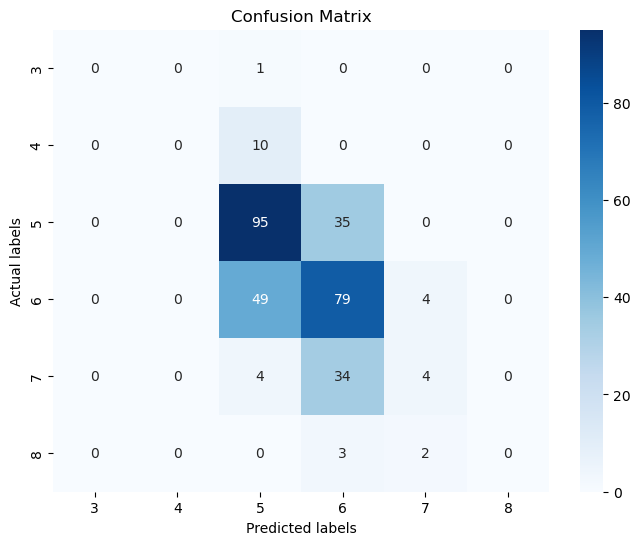

ANN Accuracy: 0.55625


In [133]:
accuracy2 = train_ann_model(X_train, y_train, X_test, y_test, 50, plot=True)

print("ANN Accuracy:", accuracy2)



# Decision Forest

In [128]:
#Decision tree 
def train_decision_tree(X_train, y_train, X_test, y_test):
    
    decision_tree = DecisionTreeClassifier(
        criterion='entropy',  # Split criterion: 'entropy' for information gain
        max_depth=100,  # Maximum depth of the tree
        min_samples_split=2,  # Minimum number of samples required to split an internal node
        min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
        max_features=100,  # Number of features to consider when looking for the best split
        random_state=42  # Random state for reproducibility
    )    

    # Initialize the Decision Tree classifier
    decision_tree = DecisionTreeClassifier(random_state=42)

    # Train the model
    decision_tree.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = decision_tree.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the tree
    feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    class_names = ["3", "4", "5", "6", "7", "8"]
    tree_rules = export_text(decision_tree, feature_names = feature_names)
    
    # Plot the tree
    plt.figure(figsize=(20, 10))
    plot_tree(decision_tree, max_depth=2, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()
    
    # Print error analysis
    wrong_prediction_analysis(y_test.values, y_pred)
    
    return accuracy, tree_rules


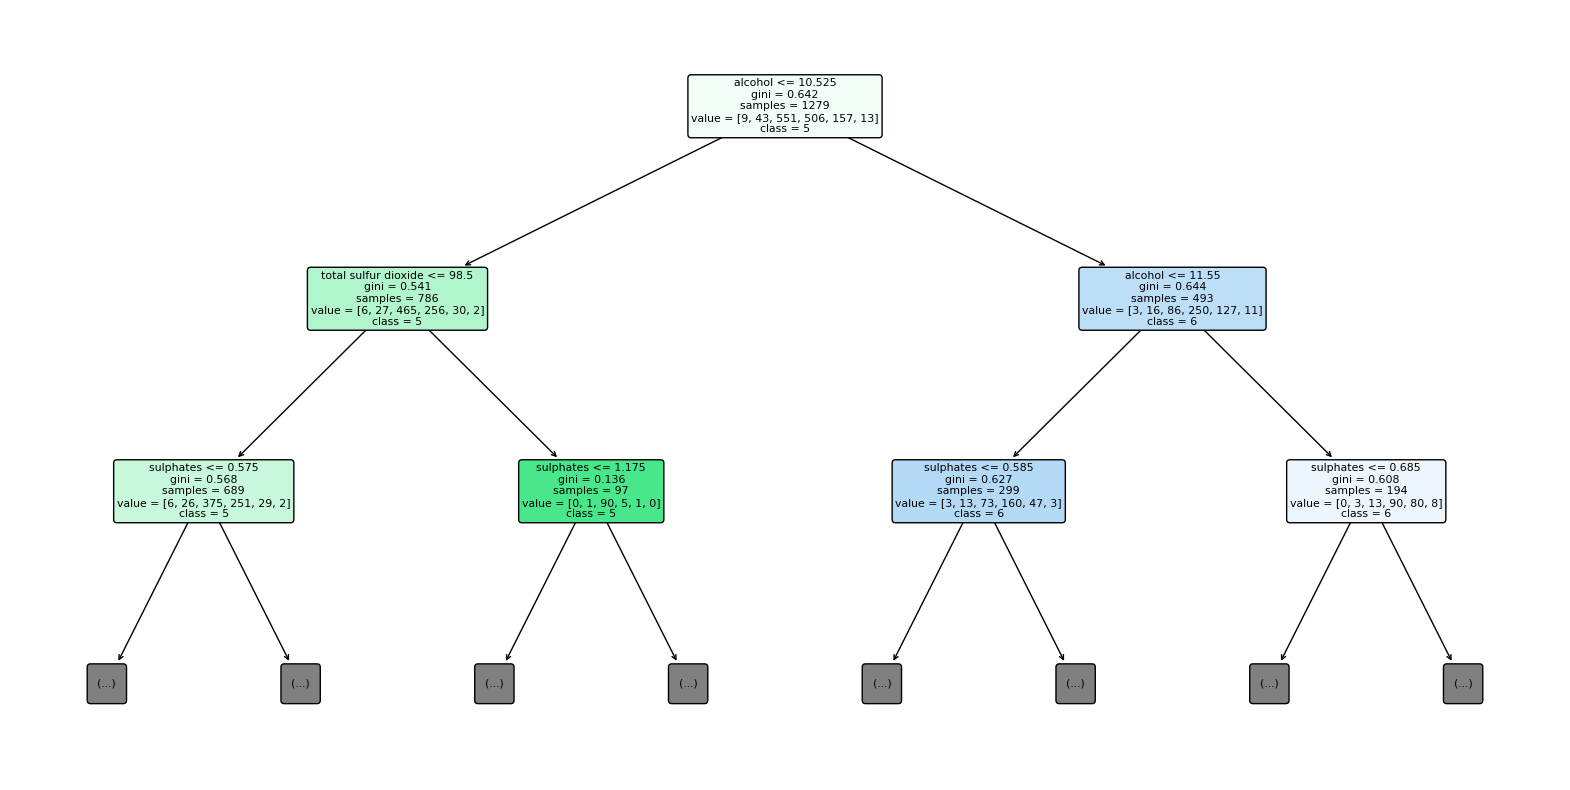

Number of predictions: 320
Number of wrong predictions: 141
Wrong predictions count for each quality: 
{3: 1, 4: 10, 5: 42, 6: 62, 7: 21, 8: 5}
Total number for each quality
{3: 1, 4: 10, 5: 130, 6: 132, 7: 42, 8: 5}


Misclassified Quality/Total Quality: 
{3: 1.0, 4: 1.0, 5: 0.3230769230769231, 6: 0.4696969696969697, 7: 0.5, 8: 1.0}


Quality 3 is likely to be misclassified as: 
{4: 0.0, 5: 0.0, 6: 1.0, 7: 0.0, 8: 0.0}
Quality 4 is likely to be misclassified as: 
{3: 0.0, 5: 0.5, 6: 0.5, 7: 0.0, 8: 0.0}
Quality 5 is likely to be misclassified as: 
{3: 0.007692307692307693, 4: 0.03076923076923077, 6: 0.2692307692307692, 7: 0.015384615384615385, 8: 0.0}
Quality 6 is likely to be misclassified as: 
{3: 0.0, 4: 0.022727272727272728, 5: 0.30303030303030304, 7: 0.12878787878787878, 8: 0.015151515151515152}
Quality 7 is likely to be misclassified as: 
{3: 0.0, 4: 0.023809523809523808, 5: 0.11904761904761904, 6: 0.3333333333333333, 8: 0.023809523809523808}
Quality 8 is likely to be misclassif

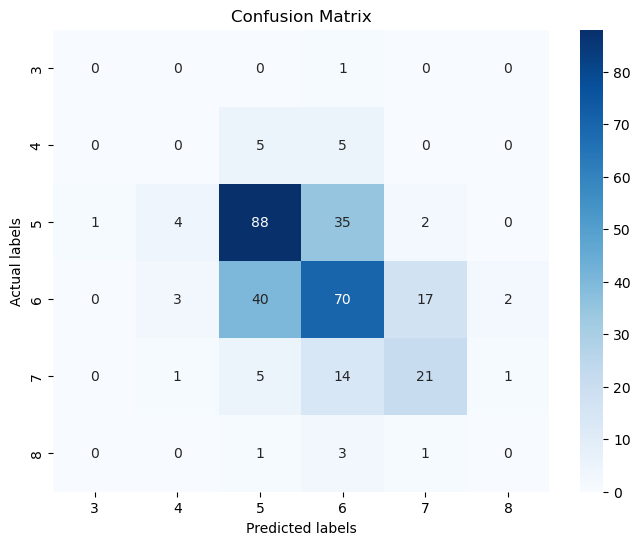

In [129]:
# change max_depth to play with the tree plot
accuracy3, tree_rules = train_decision_tree(X_train, y_train, X_test, y_test)

In [111]:
print(tree_rules)

|--- alcohol <= 10.53
|   |--- total sulfur dioxide <= 98.50
|   |   |--- sulphates <= 0.57
|   |   |   |--- alcohol <= 9.75
|   |   |   |   |--- pH <= 3.54
|   |   |   |   |   |--- alcohol <= 9.08
|   |   |   |   |   |   |--- residual sugar <= 2.05
|   |   |   |   |   |   |   |--- density <= 1.00
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- density >  1.00
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- residual sugar >  2.05
|   |   |   |   |   |   |   |--- pH <= 3.35
|   |   |   |   |   |   |   |   |--- density <= 1.00
|   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |--- density >  1.00
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- pH >  3.35
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- alcohol >  9.08
|   |   |   |   |   |   |--- residual sugar <= 4.40
|   |   |   |   |   |   |   |--- volatile acidity <= 0.27
|   |   |   |   |

# Random Forest

In [99]:
# Random forest 
def train_random_forest(X_train, y_train, X_test, y_test):

    # Initialize the Random Forest classifier with specified hyperparameters
    random_forest = RandomForestClassifier(
        n_estimators=100,  # Number of trees in the forest
        criterion='entropy',  # Split criterion: 'gini' for Gini impurity or 'entropy' for information gain
        max_depth=None,  # Maximum depth of the trees
        min_samples_split=2,  # Minimum number of samples required to split an internal node
        min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
        max_features=None,  # Number of features to consider when looking for the best split
        random_state=42,  # Random state for reproducibility     
    )

    # Train the model
    random_forest.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = random_forest.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    
    return accuracy

In [100]:
# #Call the function
# accuracy = train_perceptron_model(X_train, y_train, X_test, y_test)
# print("Perceptron Accuracy:", accuracy)

# accuracy2=train_ann_model(X_train, y_train, X_test, y_test)
# print("ANN Accuracy:", accuracy2)

# accuracy3 = train_decision_tree(X_train, y_train, X_test, y_test)
# print("Decision Tree Accuracy:", accuracy3)

# accuracy4 = train_random_forest(X_train, y_train, X_test, y_test)
# print("Random Forest Accuracy:", accuracy4)

Perceptron Accuracy: 0.434375
ANN Accuracy: 0.5625
Decision Tree Accuracy: 0.559375
Random Forest Accuracy: 0.640625


# Equalize each quality in the dataset

In [137]:
y_array = y.values

In [152]:
np.count_nonzero(y_array == 3)

10

In [147]:
np.count_nonzero(y_array == 5)

681

In [148]:
np.count_nonzero(y_array == 6)

638

In [ ]:
# Non feasible: there are much more samples belong to 5 and 6